# 机器学习练习 6 - 支持向量机

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

raw_data = loadmat('data/ex6data1.mat')
raw_data

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

用散点图表示，其中类标签由符号表示（+表示正类，o表示负类）。

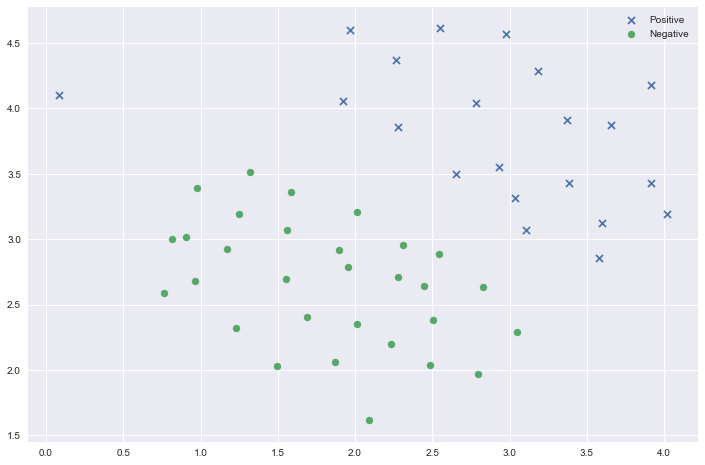

In [34]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

In [35]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [36]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

C的值越大

In [37]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

0.94117647058823528

通过增加C的值，创建了一个不再适合数据的决策边界。 我们通过查看每个类别预测的置信水平来看出该点与超平面距离的函数。

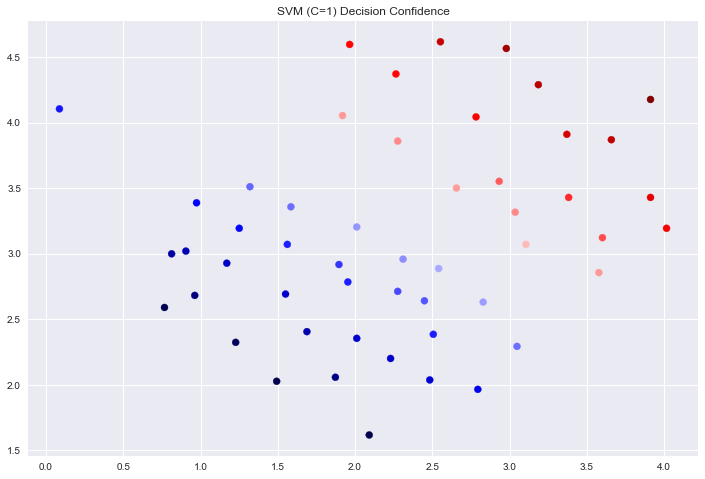

In [38]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

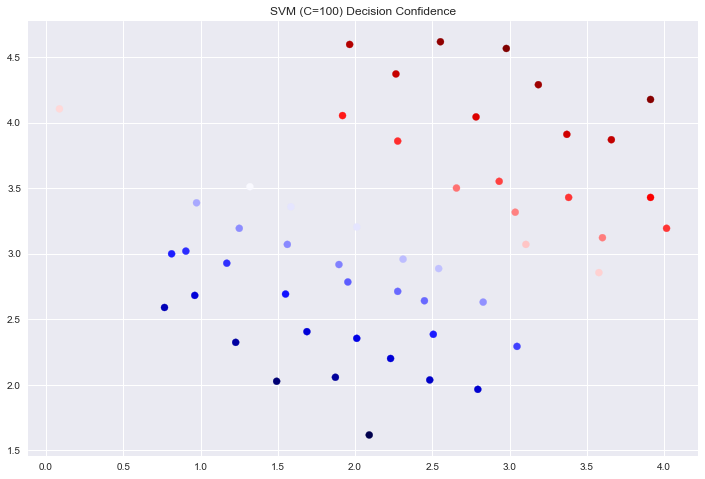

In [39]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [40]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [41]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

检查另一个数据集，这次用非线性决策边界。

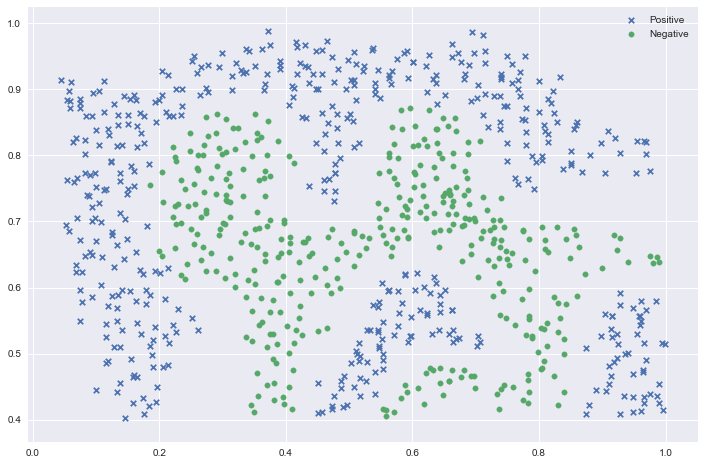

In [29]:
raw_data = loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

从结果可以看出，大部分是正确的。

In [43]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

1.0

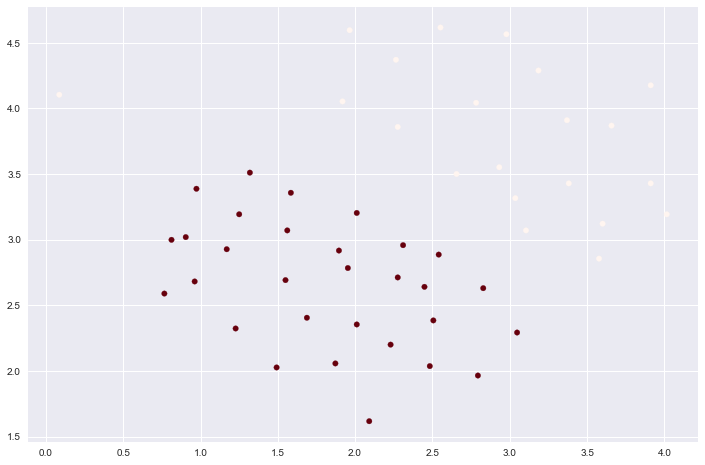

In [45]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

对于第三个数据集，给出了训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。

In [46]:
raw_data = loadmat('data/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

In [47]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

spam_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [48]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

每个文档已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示文档中是否存在单词。 在这一点上，训练评估是用一个分类器拟合测试数据的问题。

In [49]:
svc = svm.SVC()
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 94.4%


In [50]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy = 95.3%
